# Logistic Regression of Credit Defaults
## MSDS 7349 - Section 401
## Lab 1

[Data Science @ Southern Methodist University](https://datascience.smu.edu/)

**Team:**
    * Jostein Barry-Straume
    * Kevin Cannon
    * Ernesto Carrera Ruvalcaba
    * Adam Tschannen

# Table of Contents
* [Team Members](#Team-Members)
* [Business Understanding](#Business-Understanding)
* [Data Meaning Type](#Data-Meaning-Type)
* [Data Quality](#Data-Quality)
* [Simple Statistics](#Simple-Statistics)
* [Visualize Attributes](#Visualize-Attributes)
* [Explore Joint Attributes](#Explore-Joint-Attributes)
* [Explore Attributes and Class](#Explore-Attributes-and-Class)
* [New Features](#New-Features)
* [Exceptional Work](#Exceptional-Work)
* [References](#References)

# <a name="Team-Members"></a>Team Members
* [Jostein Barry-Straume](https://github.com/josteinstraume)
* [Kevin Cannon](https://github.com/kcannon2)
* [Ernesto Carrera Ruvalcaba](https://github.com/ecarrerasmu)
* [Adam Tschannen](https://github.com/adamtschannen)

# <a name="Business-Understanding"></a>Business Understanding
> Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

> The credit default data set is from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#). It has 30,000 records with 24 attributes. The records reflect the payment data from an important Taiwanese bank during October, 2005 (Yeh & Lien 2475).

> The purpose of the data set was to tackle the issue of forecasting the probability of default. In particular, the researchers of this data set sought to determine if the "estimated probability of default produced from data mining methods... (could) represent the "real" probability of default" (Yeh & Lien 2473).

> One way to define and measure the outcomes from the data set would be to perform a logistic regression. In doing so, one could predict if a customer would default on a credit payment in the next month.

> In order to measure the effectiveness of the prediction algorithm, the data set will be randomly split into a training and a test data sets. Consequently, we can then measure the accuracy of the prediction algorithm with real world data.

# <a name="Data-Meaning-Type"></a>Data Meaning Type
> Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

| Variable | Variable Type | Summary |
| :------: | :-----------: | :-----: |
| LIMIT_BAL | int64 | Test |
| SEX | int64 | int64 |
| EDUCATION | int64 | Test |
| MARRIAGE | int64 | Test |
| AGE | int64 | Test |
| PAY_0 | int64 | Test |
| PAY_2 | int64 | Test |
| PAY_3 | int64 | Test |
| PAY_4 | int64 | Test |
| PAY_5 | int64 | Test |
| PAY_6 | int64 | Test |
| BILL_ATM1 | int64 | Test |
| BILL_ATM2 | int64 | Test |
| BILL_ATM3 | int64 | Test |
| BILL_ATM4 | int64 | Test |
| BILL_ATM5 | int64 | Test |
| BILL_ATM6 | int64 | Test |
| PAY_ATM1 | int64 | Test |
| PAY_ATM2 | int64 | Test |
| PAY_ATM3 | int64 | Test |
| PAY_ATM4 | int64 | Test |
| PAY_ATM5 | int64 | Test |
| PAY_ATM6 | int64 | Test |
| default payment next month | int64 | Test |

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import statistics as st
import csv as csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline

filepath = "/Users/Jostein/Grad School/SMU/7331/project1/credit-default/data/default of credit card clients.xls"
credit = pd.read_excel(filepath, header=1, skiprows=0)

# Rename column(s)
credit = credit.rename(columns={'default payment next month': 'default_next_m'})
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_next_m'],
      dtype='object')

# <a name="Data-Quality"></a>Data Quality
>Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

# <a name="Simple-Statistics"></a>Simple Statistics
>Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful. 

# <a name="Visualize-Attributes"></a>Visualize Attributes
>Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

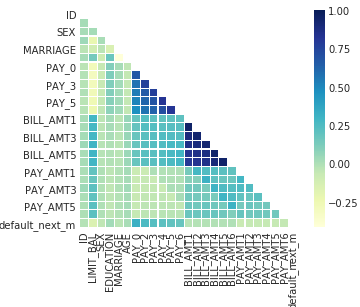

In [3]:
# Pretty correlation heat map matrix
corr = credit.corr(method='pearson')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure()
    credit_heatmap_corr = sns.heatmap(corr, mask=mask, square=True,
                                    linewidths=.1, cmap="YlGnBu")
    plt.savefig('/Users/Jostein/Grad School/SMU/7331/project1/credit-default/'
                + '/plots/corr_heatmap')

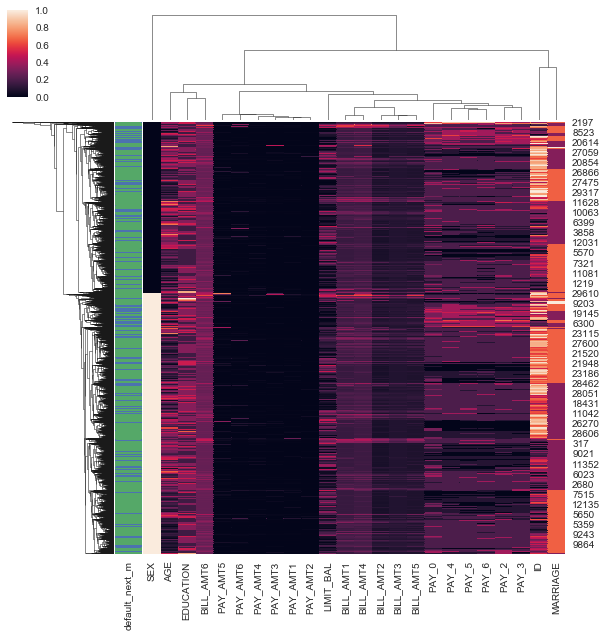

In [8]:
# Cluster Heat Map
# Source:
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
plt.figure()
sns.set(color_codes=True)
#y_defaults = credit.pop("default_next_m")
y_defaults = credit.default_next_m
lut = dict(zip(y_defaults.unique(), "bg"))
row_colors = y_defaults.map(lut)
g = sns.clustermap(credit, row_colors=row_colors, standard_scale=1)
g.savefig('/Users/Jostein/Grad School/SMU/7331/project1/credit-default/'
                + '/plots/cluster_heatmap')

# <a name="Explore-Joint-Attributes"></a>Explore Joint Attributes
>	Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

# <a name="Explore-Attributes-and-Class"></a>Explore Attributes and Class
>Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

# <a name="New-Features"></a>New Features
>Are there other features that could be added to the data or created from existing features? Which ones?

> Calculate limit balance

# <a name="Exceptional-Work"></a>Exceptional Work
>	You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

# <a name="References"></a>References
* Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.
* https://pandas.pydata.org/pandas-docs/stable/api.html